<a href="https://www.kaggle.com/code/mdsohailahmed/feature-saling-standardization-and-normalization?scriptVersionId=108516540" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
##feature scaling is the laststeps in data preprocessing and before machine learning model training 
#we apply feature scaling on independent variable
#we fit feature scaling with train data and transform on traina and test data

In [3]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.shape

(891, 12)

In [7]:
test_data.shape

(418, 11)

In [8]:
df=train_data[['Survived','Pclass','Age','Parch']]
df.head(2)

,Survived,Pclass,Age,Parch
0,0,3,22.0,0
1,1,1,38.0,0


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Parch         0
dtype: int64

In [10]:
df2=df.fillna(df.mean())

In [11]:
df2.isnull().sum()

Survived    0
Pclass      0
Age         0
Parch       0
dtype: int64

In [12]:
x=df2.drop('Survived',axis=1)
y=df2['Survived']

In [13]:
print("shape of x=",x.shape)
print('shape of y=',y.shape)

shape of x= (891, 3)
shape of y= (891,)


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [15]:
print('shape of x_train=',x_train.shape)
print('shape of y_train=',y_train.shape)
print('shape of x_test=',x_test.shape)
print('shape of y_test=',x_test.shape)


shape of x_train= (712, 3)
shape of y_train= (712,)
shape of x_test= (179, 3)
shape of y_test= (179, 3)


In [16]:
#Standardization rescale the feature such as mean(0) and standard deviation=1
# the result of standardization is called z-score
#usually we use standardization when our data follow normal distribution

In [17]:
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [18]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [19]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [20]:
x_train.describe()

,Pclass,Age,Parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [21]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [22]:
x_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [23]:
x_test_sc

array([[-1.54750023,  0.80404914, -0.49198545],
       [ 0.8220055 ,  0.18826805, -0.49198545],
       [ 0.8220055 ,  0.03432278, -0.49198545],
       [-1.54750023,  0.01116307, -0.49198545],
       [-0.36274737,  0.34221332,  0.76354731],
       [ 0.8220055 ,  0.18826805, -0.49198545],
       [-1.54750023,  1.34285759, -0.49198545],
       [ 0.8220055 , -1.04329413, -0.49198545],
       [-0.36274737,  2.80533768, -0.49198545],
       [-1.54750023, -1.12026677,  0.76354731],
       [-0.36274737,  0.11129541, -0.49198545],
       [-0.36274737, -0.1196225 , -0.49198545],
       [-1.54750023,  1.18891232, -0.49198545],
       [ 0.8220055 , -0.50448568, -0.49198545],
       [ 0.8220055 ,  0.88102177,  5.78567837],
       [-0.36274737, -0.35054041, -0.49198545],
       [-0.36274737,  0.49615859,  2.01908008],
       [ 0.8220055 ,  0.01116307, -0.49198545],
       [ 0.8220055 ,  0.01116307, -0.49198545],
       [-0.36274737, -0.81237622, -0.49198545],
       [ 0.8220055 ,  0.01116307, -0.491

In [24]:
x_train_sc=pd.DataFrame(x_train_sc,columns=['Pclass','Age','Parch'])
x_test_sc=pd.DataFrame(x_test_sc,columns=['Pclass','Age','Parch'])

In [25]:
x_train_sc

,Pclass,Age,Parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080
...,...,...,...
707,0.822005,0.727077,-0.491985
708,0.822005,0.011163,0.763547
709,0.822005,1.419830,3.274613
710,0.822005,0.011163,0.763547


In [26]:
#normaliztion rescale the feature in fixed range between 0 to 1
#it is also called as MinMaxScaler
#if data doesn't follow the  to normal distribution

# there is no thumb rule to use standardiztion or normalization for special ML algorithm

In [27]:
mms=MinMaxScaler()
mms.fit(x_train)

MinMaxScaler()

In [28]:
x_train_mms=mms.transform(x_train)
x_test_mms=mms.transform(x_test)

In [29]:
x_train_mms

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [30]:
x_train_mms=pd.DataFrame(x_train_mms,columns=['Pclass','Age','Parch'])
x_train_mms=pd.DataFrame(x_test_mms,columns=['Pclass','Age','Parch'])

In [31]:
x_train_mms.describe().round(2)

,Pclass,Age,Parch
count,179.00,179.00,179.00
mean,0.66,0.42,0.07
std,0.40,0.18,0.17
min,0.00,0.01,0.00
25%,0.50,0.33,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.13,1.20


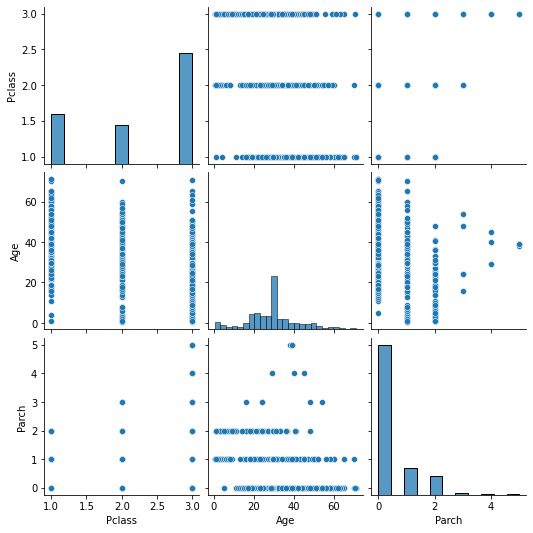

In [32]:
sns.pairplot(x_train)

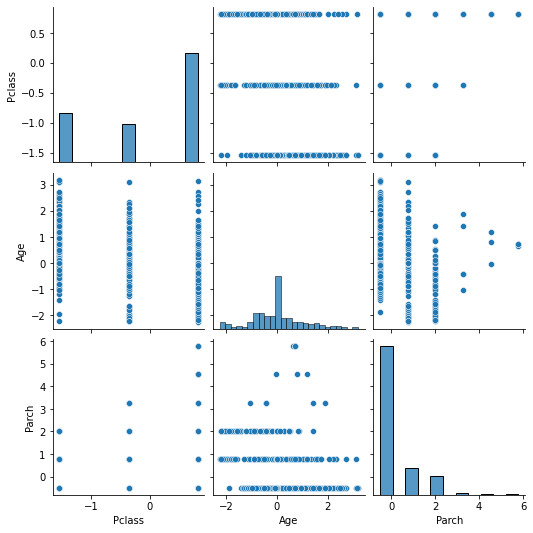

In [33]:
sns.pairplot(x_train_sc)

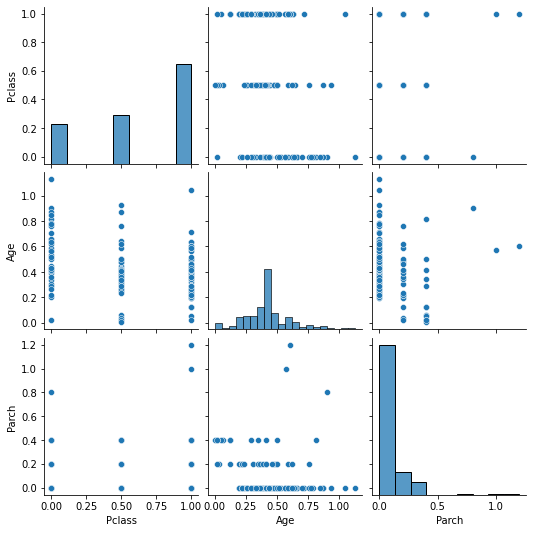

In [34]:
sns.pairplot(x_train_mms)